In [1]:
import os
import copy
import pickle
import numpy as np
import glob

# matplotlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# astropy
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.utils.data import download_file
from astropy.coordinates import SkyCoord, Angle
from astropy import wcs
from astropy.table import Table,vstack
import astropy.units as u
import matplotlib.pyplot as plt 

import sncosmo

import sys
# so can find module one dir back; don't need to explicitly put .py into each subfolder 
sys.path.append("../..")
from candels_galaxy_surveys import galaxy_catalog,galaxy_survey
import update_galaxy_survey

# so can find script for host ellipses 
sys.path.append("../../visualize_hosts/")
from sn_cutout import ellipse

In [2]:
candels = pickle.load(open('delz_candels.pkl','rb'))

In [5]:
GND13Mar = candels[-10]

delz = GND13Mar[0]
nearby = GND13Mar[1][1]
host = GND13Mar[1][2]
lc = GND13Mar[1][3]

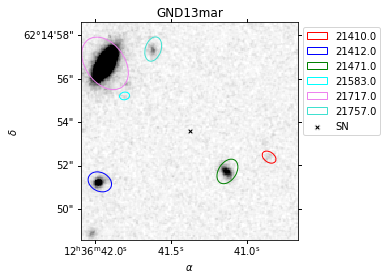

In [7]:
nick = GND13Mar[1][0]['name'] 
# the SN skycoord location
sn_loc = SkyCoord(GND13Mar[1][0]['RA'],GND13Mar[1][0]['DEC'],unit = (u.hourangle,u.deg))


# updating the surveys
update_near = update_galaxy_survey.update_survey(nearby)
update_host = update_galaxy_survey.update_survey(host[0])

# renaming for clarity
nearby = update_near
host = [update_host,host[1],host[2]]

# getting list of the ids, elliptical parameters for each nearby for this SN
ids = [i for i in nearby.mass[nearby.ids]]
nearby_coords = [i for i in nearby.gal_skycoords()]
a_ellipse = [np.float(i) for i in nearby.photom[nearby.a_ellip]]
b_ellipse = [np.float(i) for i in nearby.photom[nearby.b_ellip]]
theta_ellipse = [np.float(i) for i in nearby.photom[nearby.theta_ellip]]
gal_sources = [nearby.source]*len(nearby.photom)

# 5 element list, each element another x element list for a given SN with the x candidate parameters.
possible_hosts = [nearby_coords, a_ellipse, b_ellipse, theta_ellipse,ids,gal_sources]

# the ellipse 2nd argument wants a list with the x candidate parameters all together 
# ie not [[all coords], [all a], [all b], [all theta]] rather [[coords,a,b,theta],...]
possible_hosts = list(zip(possible_hosts[0],possible_hosts[1],possible_hosts[2],possible_hosts[3],possible_hosts[4],possible_hosts[5]))

ellipse(nick.lower()+'10x10.fits',possible_hosts,sn_loc,title=nick,save=False,show=True,diverging=False,logscale=False,val_min = -.006,val_max = .0525 )

In [8]:
from astropy.table import hstack
print(hstack([nearby.mass[nearby.ids,nearby.redshift_names],nearby.physpar[nearby.zspec,nearby.zphot,nearby.dz_l95,nearby.dz_u95]]))

  id    z     z_spec z_peak  l95   u95 
----- ------ ------- ------ ----- -----
21410 1.1500 -1.0000 1.1485 0.746 1.964
21412 2.0000 -1.0000 2.0047 1.833 2.153
21471 1.0100 -1.0000 1.0146 0.891 1.103
21583 0.4600 -1.0000 0.4643 0.067 0.922
21717 0.8500  0.8500 0.8502 0.800 0.897
21757 0.9300 -1.0000 0.9334 0.110 1.476


## Don't see this one published anywhere?

## It doesn't have obvious host

## The nearest galaxy 21471 I've got as  photz ~ 1.0146 = [0.89,1.103] 

## have HST grism specz ~ 1.999 for that galaxy

## another nearby 21412 has photz ~ 2.0 = [1.83,2.15]

## Evernote says CC SN z ~ 1.75 +- .25

## This seems reasonable since the two somewhat near objects agree with this 

## Dont think we need to update